# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


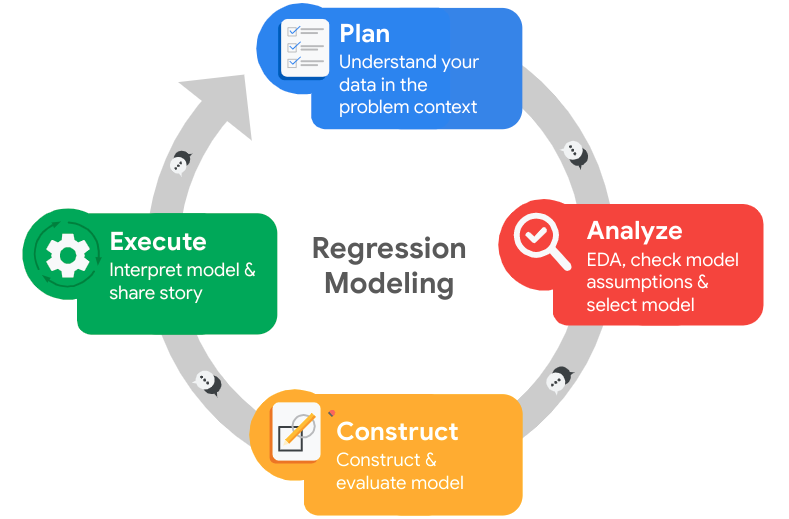

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0.rename(columns = {'satisfaction_level' : 'SL', 'last_evaluation' : 'LE', 'number_project' : 'projects', 'average_montly_hours' : 'AMH',
                     'time_spend_company': 'TSC' , 'Work_accident' : 'WA', 'promotion_last_5years' : 'promotion'}, inplace=True)


# Display all column names after the update
df0.columns


Index(['SL', 'LE', 'projects', 'AMH', 'TSC', 'WA', 'left', 'promotion',
       'Department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isna().sum()


SL            0
LE            0
projects      0
AMH           0
TSC           0
WA            0
left          0
promotion     0
Department    0
salary        0
dtype: int64

There are no missing values in the dataset.

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()


3008

3,008 rows contains duplicates. 20% of the data.

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()


,SL,LE,projects,AMH,TSC,WA,left,promotion,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


What is the possibility that two eployee fill out the exact same response for every column. In other words how likely is it that there are legitimate entries?
We can likelihood analysis but beacuse there are sevral contnious variable in the 10 columns this seems unlikely that these entries are legitimate.

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep = 'first')


# Display first few rows of new dataframe as needed
df1.head()

,SL,LE,projects,AMH,TSC,WA,left,promotion,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Now there are no duplicates in the dataset.

### Check outliers

Check for outliers in the data.

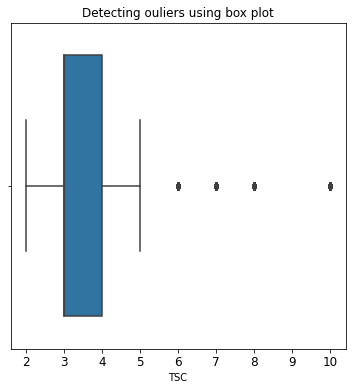

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize = (6,6))
plt.title('Detecting ouliers using box plot')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
sns.boxplot(x = df1['TSC'])
plt.show()



The abpve graph shows ouliers in the time spend in company variable.

This will be helpfull for detetecting outliers in rows.

In [12]:
# Determine the number of rows containing outliers
# Calclulating the 25 percentile of Tenure 
percentile25 = df1['TSC'].quantile(0.25)

# Calclulating the 75 percentile of Tenure
percentile75 = df1['TSC'].quantile(0.75)

# Calculating the inter quartile range of tenure
iqr = percentile75 - percentile25

# Upper limit and lower limit of inter quartile range
# 1.5 is the standar deviation of tenure column or TSC column
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

df_outliers = df1[(df1['TSC']>upper_limit) | (df1['TSC'] < lower_limit)]
df_outliers.shape


(824, 10)

There are 824 Outliers in the dataframe. Resepected to the model we need to remove or not reomove these outliers becuase some models are more sensitive to ouliers.

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
total_left = df1['left'].value_counts()
print(total_left)

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True))


0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


Now, 10,000 people stayed and 1991 employee left the company.

Percentage wise 83.4% employee stayed and 16.6% employee left.

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [14]:
df1.head()

,SL,LE,projects,AMH,TSC,WA,left,promotion,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Starting with boxplot to compare the average monthly hours and number of project they are working on.
Comparing the distribution of employee who stayed and who left.
Also creating a stacked histogram to visualize who stayed and left according to number of projects.

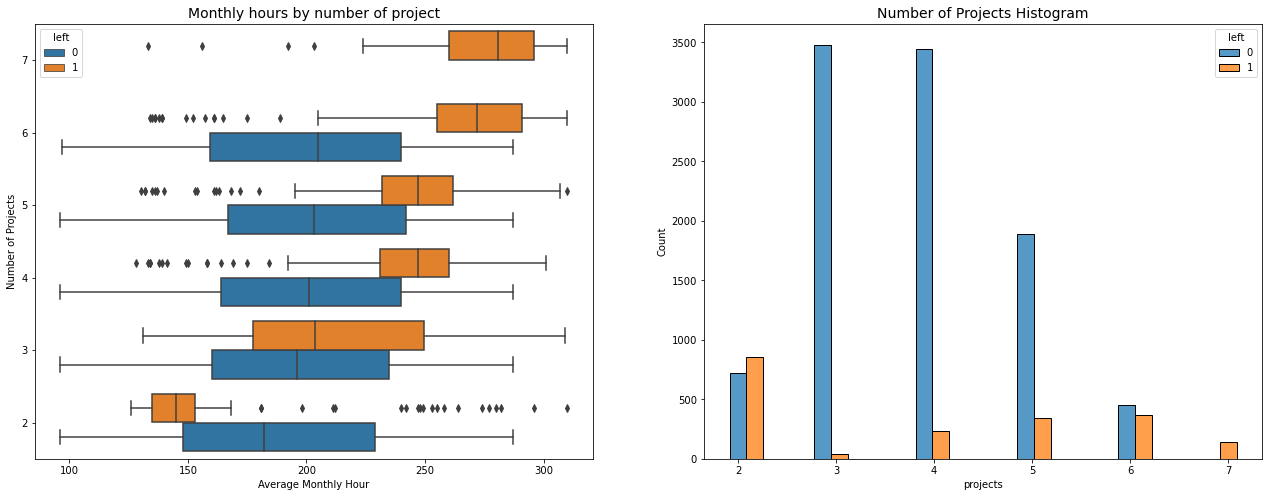

In [15]:
# Create a plot as needed
fig, ax = plt.subplots(1,2,figsize = (22, 8))
sns.boxplot(data = df1, x = 'AMH', y = 'projects', hue='left',  orient='h',ax=ax[0])
ax[0].invert_yaxis()
ax[0].set(xlabel = 'Average Monthly Hour', ylabel = 'Number of Projects')
ax[0].set_title("Monthly hours by number of project", fontsize=14)

# Creating histogram distribution of number of project, comparing employee who stayed vs who left
tenure_stay = df1[df1['left']==0]['projects']
tenure_left = df1[df1['left']==1]['projects']
sns.histplot(data = df1, x = 'projects', hue='left', multiple='dodge', shrink=2, ax = ax[1])
ax[1].set_title('Number of Projects Histogram', fontsize = 14)

plt.show()



From the above boxplot we can see that there are sevral types of employee who left beacuse of diffrent circumstances.
1. The people who worked less then their peers and have the same number of project.
It is a possibilty that they were fired because monthy average hours doesn't add up.
2. The employee who worked more than the employee who were having same number of projects.
3. Mostly are the empoyee who were working on more than 5 prjects and giving motr than 245 hours of Monthly Average Hours.


If we assume that the average number of woking hours for an employee who is woking 5 days a week and including 2 week holiday a year. 
40 hours per week : 40 X 50 Weeks = 2000 / 12 Months  = 166.67 Hours per month. 
From thr above plot it seems that employees were overworked.


In [16]:
# Number of Employees with 7 project
df1[df1['projects']== 7]['left'].value_counts()

1    145
Name: left, dtype: int64

145 people were working on 7 projects and they left the company.

Now, we can create a scatter plot to visualize employee who left with respect to the satisfaction level.

Text(0.5, 1.0, 'Monthly hours by satisfaction level of emoplyee')

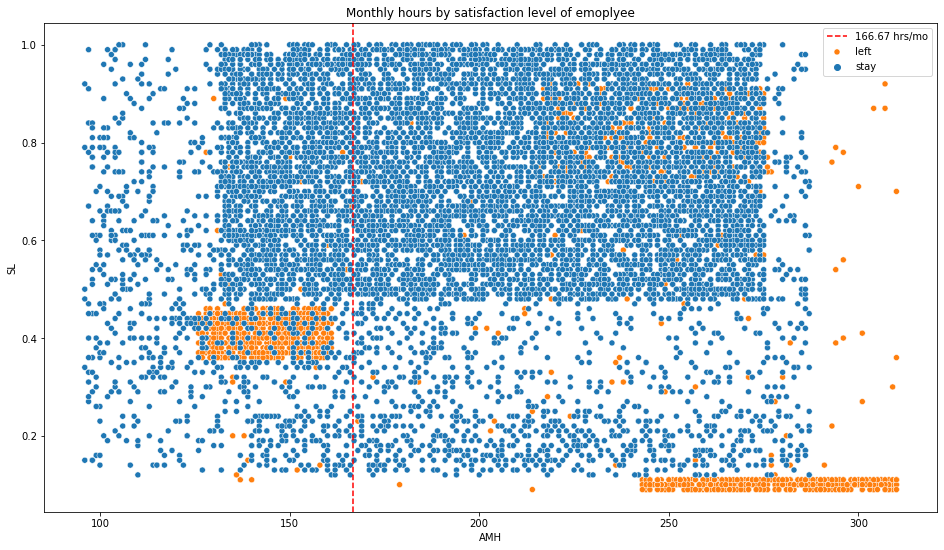

In [17]:
# Create a plot as needed
plt.figure(figsize=(16,9))
sns.scatterplot(data=df1, x = 'AMH', y ='SL', hue = 'left')
plt.axvline(x = 166.67, color ='red', label='166.67 hours/month', ls='--' )
plt.legend(labels = ['166.67 hrs/mo', 'left', 'stay'])
plt.title('Monthly hours by satisfaction level of emoplyee')

The above plot shows that employee working at 240 to 310 hours per month are the one's who left the most. It is expected that the satisfaction level will be close to zero.

The plot also shows that there is also a group of people who left while their working hours were close to averge working hours of an employee. Its hard to speculate the reason that why this group of people left and their satisfation level is 0.4 on average.

Finlly there is a group of people whose woking hours is ~210-250 and satisfation level is ~0.7-0.9.

It might be intresting to visulize satisfation level with respect to tenure.

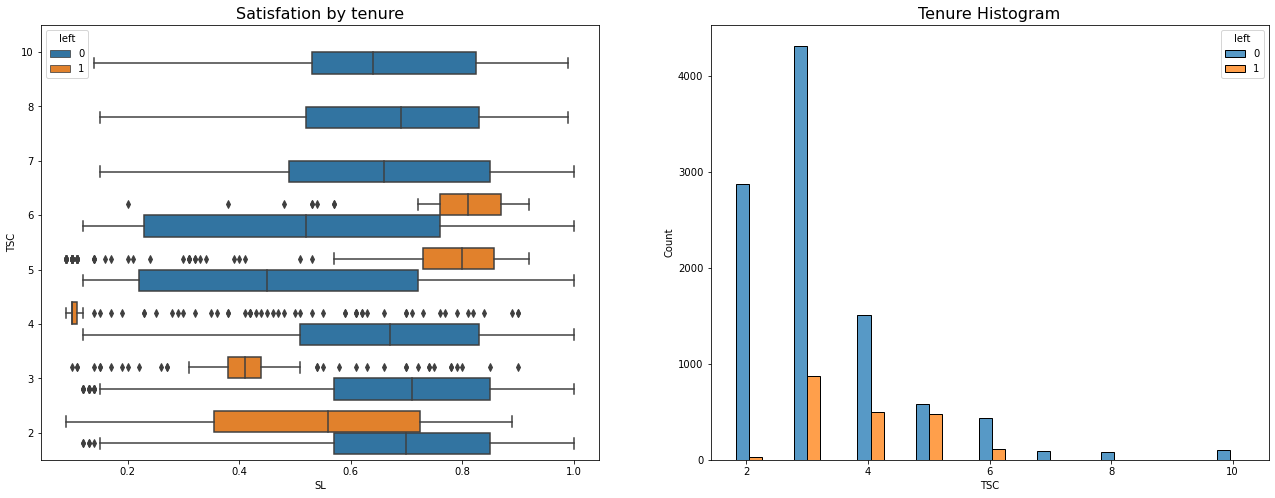

In [18]:
# Creating a box plot to visualize satisfaction level with respect to tenure
fig, ax = plt.subplots(1,2, figsize = (22,8))

sns.boxplot(data = df1 , x = 'SL', y = 'TSC', hue='left',orient ='h', ax = ax[0])
ax[0].invert_yaxis()
ax[0].set_title("Satisfation by tenure", fontsize = 16)

# Ploting a histogram distributing satisfation by tenure, comparing employee who left vs stayed.
tenure_stay = df1[df1['left']==0]['TSC']
tenure_left = df1[df1['left']==1]['TSC']
sns.histplot(data = df1, x = 'TSC', hue='left', multiple='dodge', shrink = 5, ax = ax[1])
ax[1].set_title("Tenure Histogram", fontsize = 16)
plt.show()


1. There are genrally two categories, first disatisfied employee with shorter tenures, and satisfied employee with midium length tenures.
2. Midium_length tenure employee who left have unusually low satisfation level. 
3. The longest tenure employee didn't leave, there satisfation level aligned with newer employee who stayed.



Findinng mean and median of employee who left and stayed using satisfation level

In [19]:
# Create a plot as needed
import numpy as np
df1.groupby(['left'])['SL'].agg([np.mean, np.median])


,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


As expected, the satisfactory level of employee who left is lower than the employee who stayed. One more thing is intresting that the mean of satisfaction level of employee who stayed is a little less than its median. It means that the satisfaction level among those who stayed might be skewed to the left.

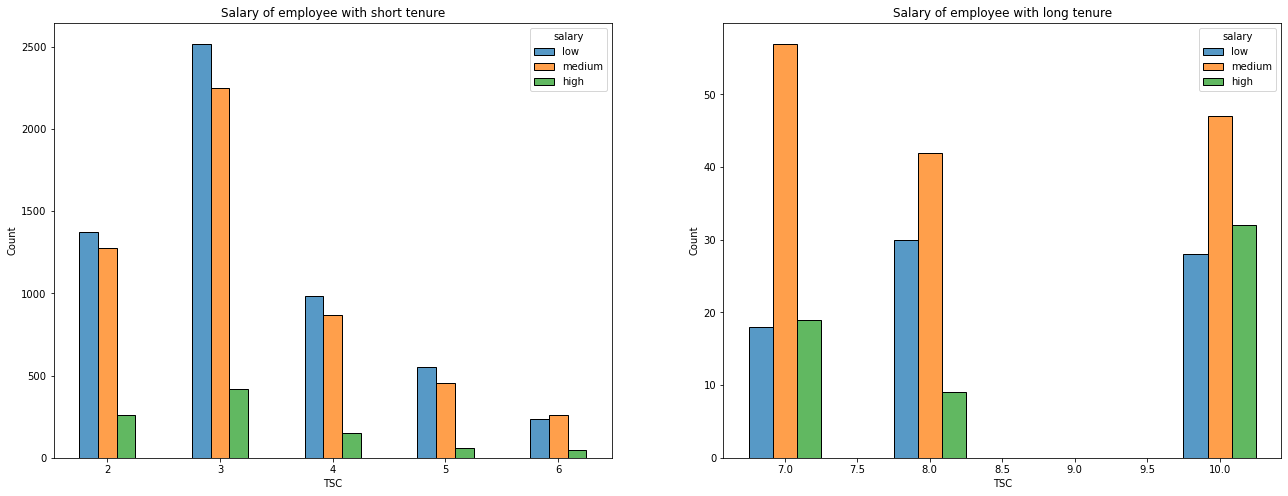

In [20]:
# Salary level among diffrent tenure
fig, ax = plt.subplots(1, 2 , figsize=(22,8))
tenure_short = df1[df1['TSC'] < 7]

tenure_long = df1[df1['TSC']>6]

sns.histplot(data = tenure_short, x = 'TSC', multiple = 'dodge', hue = 'salary', hue_order = ['low', "medium", 'high'],
            discrete = 1 , ax = ax[0], shrink = 0.5)
ax[0].set_title("Salary of employee with short tenure")

sns.histplot(data= tenure_long, x = 'TSC', hue = 'salary', shrink = 0.5, hue_order = ['low','medium','high'], multiple = 'dodge', discrete=1)
ax[1].set_title("Salary of employee with long tenure")
plt.show()

The above plot clearly states that longer tenure employee were not dispropotionately comprised of higher-pay employee.

### Insights

Poor management can be a major reason why employee are leaving this company. Leaving is directly proportional to longer working hours, many projects, and genreally lower satisfaction level. It can be ungratifying to work long hours and not recieve any up-raise or promotion from the company.
It also appears that if a employee has spend more than 6 years in the company, they tend not to leave.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Goal is to identify wehther or not employee leaves the company, which is a categorical outcome variable. 
This involves binary classification, since the outcome variable can be 1 or 0 i.e left or stayed.

### Identify the types of models most appropriate for this task.

Since this involves binary outcomes, Logistic Regression Model is best suited for this type of problem.

### Modeling

Add as many cells as you need to conduct the modeling process.

Before spliting the data we need to encode the non-numeric values.
Department and Salary


In [29]:
# Create a copy
df_copy = df1.copy()

# Encode the salary to numeric value 0-2
df_copy['salary'] = df_copy['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes

# Dummy encode the department column
df_copy = pd.get_dummies(df_copy, drop_first = False)
df_copy.head()


,SL,LE,projects,AMH,TSC,WA,left,promotion,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


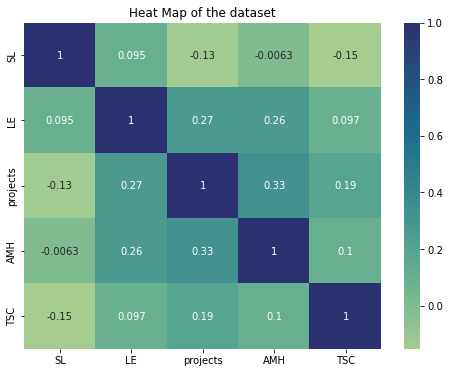

In [33]:
# Create a heatmap to check how corealated the values are.

plt.figure(figsize = (8,6))
sns.heatmap(df_copy[['SL', 'LE', 'projects', 'AMH', 'TSC']].corr(), annot = True, cmap = 'crest')
plt.title('Heat Map of the dataset')
plt.show()

Create a Stack bar plot to know which department's employee left or those who didn't.

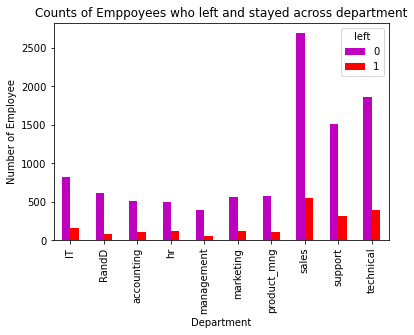

In [38]:
pd.crosstab(df1['Department'], df1['left']).plot(kind='bar', color='mr')
plt.title("Counts of Emppoyees who left and stayed across department")
plt.ylabel('Number of Employee')
plt.show()


Since logistic regression is sensitive to ouliers. We should remove the outliers we found earlier.

In [39]:
df_new = df_copy[(df_copy['TSC'] >= lower_limit) & df_copy['TSC']<= upper_limit]
df_new.head()

,SL,LE,projects,AMH,TSC,WA,left,promotion,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [41]:
# isolate the outcome variable
y = df_new['left']

In [42]:
# dropping the left row
X = df_new.drop('left', axis=1)
X.head()

,SL,LE,projects,AMH,TSC,WA,promotion,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [49]:
# Splitting the data into Training set and Testing set
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)


In [50]:
# Construct a Logistic Regression Model
log_clf = LogisticRegression(random_state = 42, max_iter = 500).fit(X_train, Y_train)

Using Logistic Regression model to make pridiction on the test set

In [58]:
y_pred = log_clf.predict(X_test)

    Creating a Confusion Matrix to visualize the result of regression model

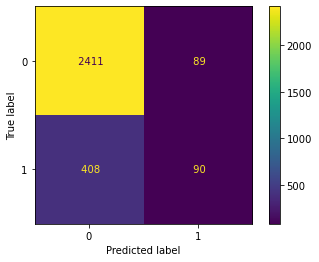

In [67]:
import sklearn.metrics as metrics

cm = metrics.confusion_matrix(Y_test, y_pred, labels = log_clf.classes_)

# Creating display of condusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = log_clf.classes_)
disp.plot(values_format =' ')
plt.show()

Discription:
The upper left corner of Confusion Matrix Shows true negative,
upper right displays false negative,
lower left displays true positive, 
lower right displays false positive


True positive : The number of people who did left the company and the model pridicted accurately.

False positive : The number of people who did not leave the company but the model pridicted as leaving.

True neagative : The number of people who do not leave the company and the model predicted this accurately.

False negative : The number of people who left this company and the model predicted as did not leave.

Next step : Checking the accuracy of our Model.

In [68]:
df_new['left'].value_counts(normalize=True)

0    0.833959
1    0.166041
Name: left, dtype: float64

In [71]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(metrics.classification_report(Y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.96      0.91      2500
    Predicted would leave       0.50      0.18      0.27       498

                 accuracy                           0.83      2998
                macro avg       0.68      0.57      0.59      2998
             weighted avg       0.80      0.83      0.80      2998



The classification above shows that logistic regression model acheived a precision of 80%, recall of 83%, and accuracy of 82%.
However, it is more important to predict employee who leave, then the score are significantly lower.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

Our Logistic Regression Model acheived precision of 80%, recall of 83%, and f1-score of 80%. Accuracy of 83% on the test set.

### Conclusion, Recommendations, Next Steps

The model confirms that the employee in the company are overworked which is the main reason of leaving this company.
To retain employee, following reccomendation can be presented infront of stakeholders.
- Cap the number of projects that empoyee can work on.
- Consider promotion for the one's who have atleast been in the company for atleast 4 years.
- Either reward empoyee for working long hours, or no need to do this.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.